In [178]:
import numpy as np 
import scipy as sc
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
from math import pi
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves


# Subir el archivo
iris=pd.read_csv('./Iris.csv')
print(iris.head())




   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [179]:
#Contar valores para cada grupo de variables (Categorías en "Species")
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

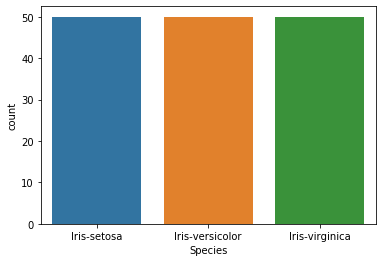

In [180]:
#Ver los contadores gráficamente
sns.countplot('Species',data=iris)
plt.show()

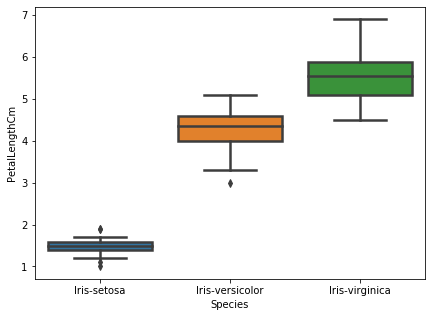

In [181]:
#Boxplots
fig=plt.gcf()
fig.set_size_inches(7,5)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris  ,linewidth=2.5 )
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3e9dea160>,
      dtype=object)

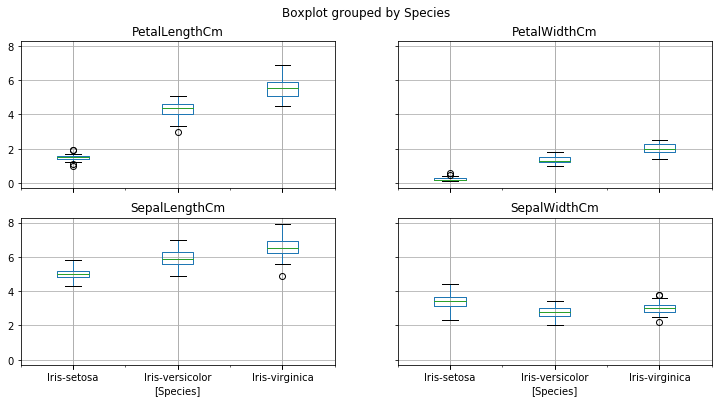

In [182]:
#Boxplots para cada variable divididos por grupos en Especie
iris_solonumerica=iris.drop("Id", axis=1)
iris_solonumerica.boxplot(by="Species", figsize=(12, 6))


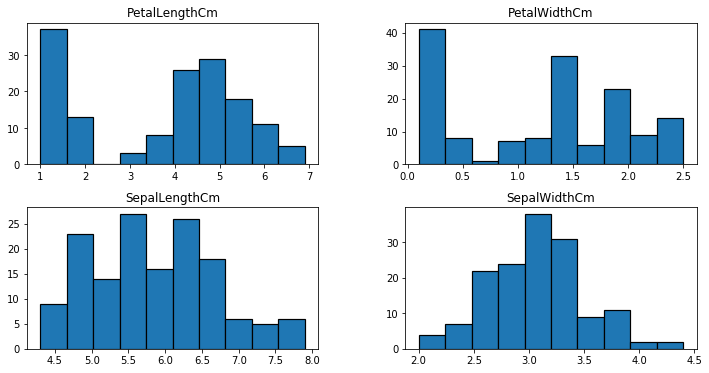

In [183]:
#Histogramas 
iris.drop('Id',axis=1).hist(edgecolor='black', linewidth=1.2, grid=False)
fig=plt.gcf()
fig.set_size_inches(12,6)

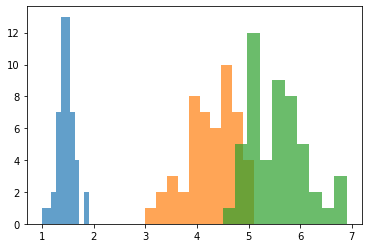

In [184]:
# Otra forma de obtener los datos iris 
# Y obtener histogramas divididos por subgrupos

from sklearn.datasets import load_iris
irissk = load_iris()
X = irissk.data
Y = irissk.target
sc.stats.describe(X)
plt.hist(X[Y == 0,2],alpha=0.7)
plt.hist(X[Y == 1,2],alpha=0.7)
plt.hist(X[Y == 2,2],alpha=0.7)
plt.show()




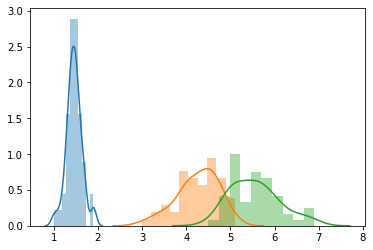

In [185]:
#Densidades kernel
sns.distplot(X[Y == 0,2],bins=10)
sns.distplot(X[Y == 1,2],bins=10)
sns.distplot(X[Y == 2,2],bins=10)
plt.show()


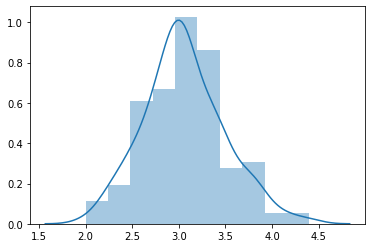

In [186]:
#KDE de una sola variable
sns.distplot(X[:,1],bins=10)
plt.show()

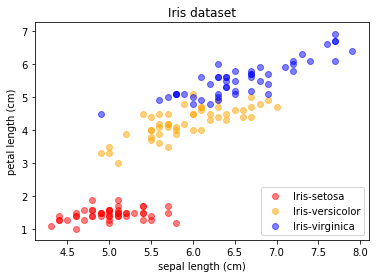

In [187]:
#Scatterplot entre dos variables
colours = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


for i in range(0, 3):    
    species_df = iris[iris['Species'] == str(species[i])]    
    plt.scatter(        
        species_df['SepalLengthCm'],        
        species_df['PetalLengthCm'],
        color=colours[i],        
        alpha=0.5,        #transparencia
        label=species[i]   
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Iris dataset')
plt.legend(loc='lower right')

plt.show()

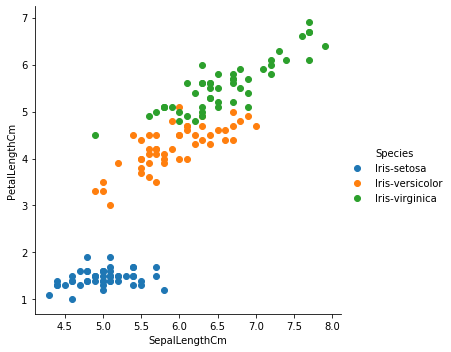

In [188]:
# Otra forma de asignar a cada especie un color
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "PetalLengthCm") \
   .add_legend()
plt.show()

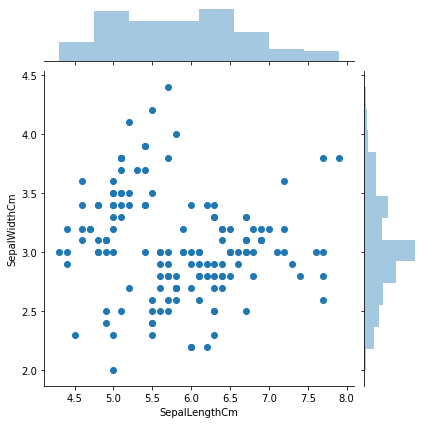

In [189]:
#Scatterplot donde salen tambien histogramas
fig=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris)

In [190]:
#Scatterplot en 3d y con movimiento
iris = px.data.iris()
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

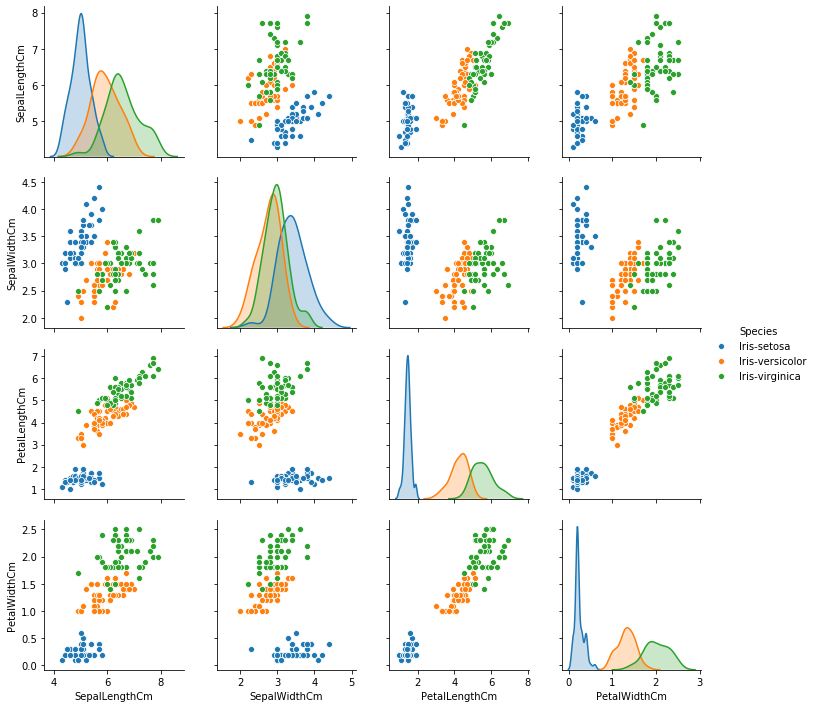

In [191]:
#Scatterplot matrix (kde en la diagonal)
sns.pairplot(iris_solonumerica,hue='Species')
plt.show()


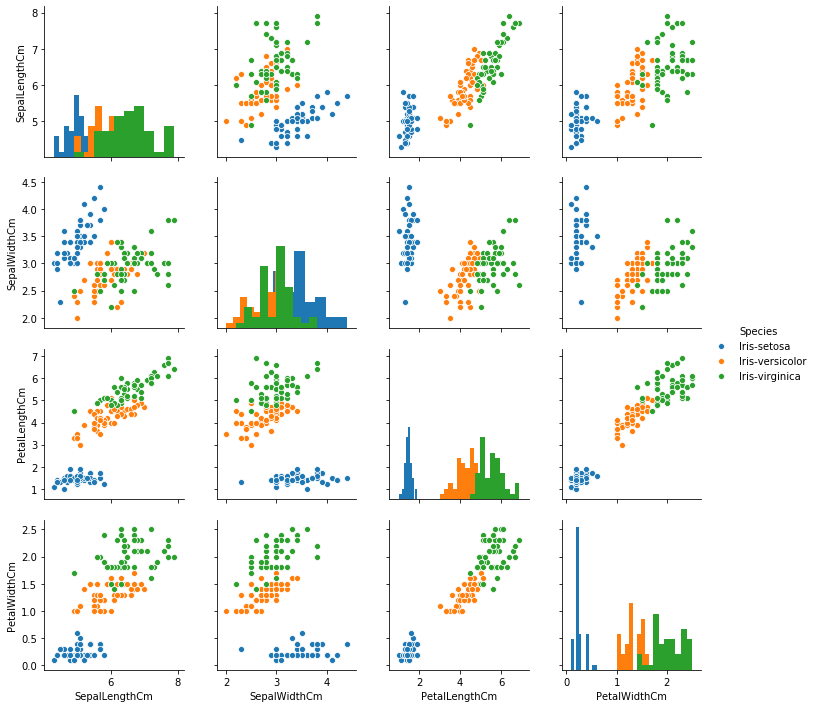

In [192]:
#Scatterplot matrix (histogramas en la diagonal)
sns.pairplot(iris_solonumerica,hue='Species', diag_kind='hist' )
plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


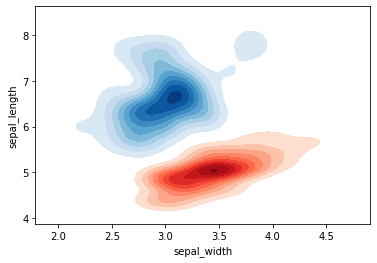

In [200]:
# Densidad kernel bidimensional

# Otra forma de cargar los datos IRIS (con seaborn - sns)


iris = sns.load_dataset("iris")
print(iris.head()) # no tiene variable Id, las demas vbles se llaman diferentes y las categorias tambien

setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
               cmap="Blues", shade=True, shade_lowest=False)

Matriz de Covarianza
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006
Matriz de Correlaciones
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


(4.0, 0.0)

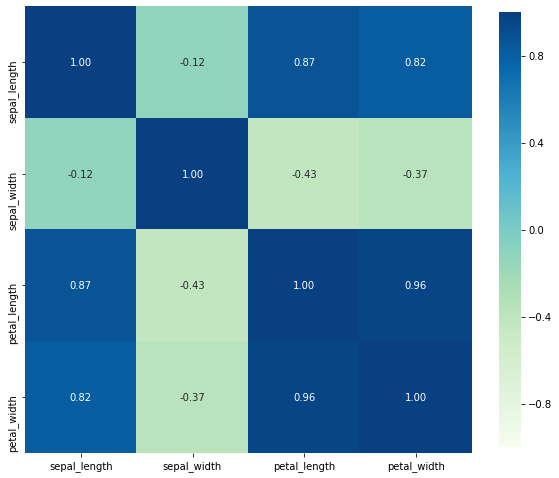

In [212]:
# Matriz de covarianza numerica 
cov_matrix = iris.cov()

# Matriz de correlaciones numerica 
correlation_matrix = iris.corr()
print('Matriz de Covarianza')
print(cov_matrix)
print('Matriz de Correlaciones')
print(correlation_matrix)

# Matriz de correlaciones gráfica 
plt.figure(figsize=(10,10))
ax=sns.heatmap(correlation_matrix,  vmax=1, vmin=-1,cbar_kws={"shrink": .8},square=True, annot=True,fmt='.2f', cmap ='GnBu',center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


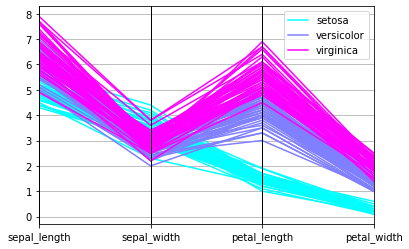

In [204]:
#Coordenadas paralelas
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "species",colormap='cool')
plt.show()

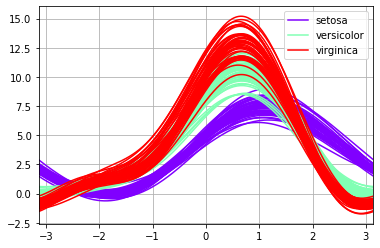

In [205]:
#Curvas de Andrews

andrews_curves(iris,"species",colormap='rainbow')
plt.show()


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


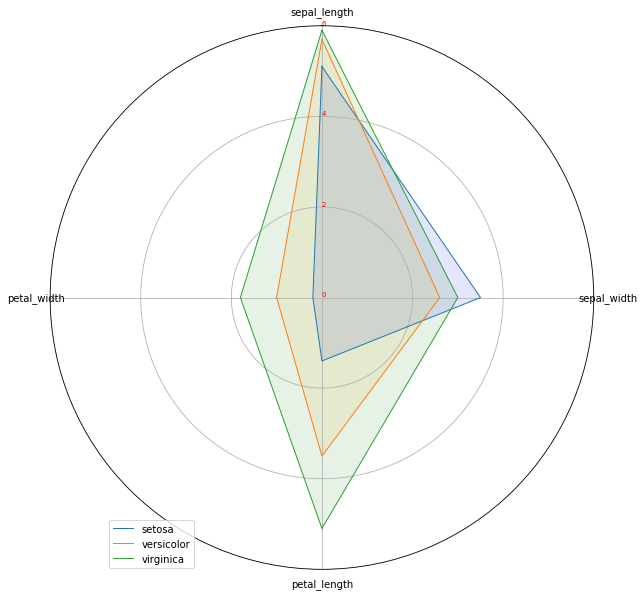

In [208]:
#Grafico Radial
new_iris=iris.drop('species',axis=1)
print(new_iris.head()) # le quitamos la variable species
categories = list(iris)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = new_iris.loc[0].values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label='setosa' )
ax.fill(angles,values,"b",alpha=0.1)


values = new_iris.loc[79].values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label='versicolor' )
ax.fill(angles,values,"orange",alpha=0.1)


values = new_iris.loc[149].values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label='virginica' )
ax.fill(angles,values,"green",alpha=0.1)

plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

